In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import norm
from word_vectors import read
from scipy.stats import spearmanr
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# 60. Loading word vectors

In [5]:
v, wv = read("data/GoogleNews-vectors-negative300.bin")
print(len(v))
print(wv.shape)

3000000
(3000000, 300)


In [6]:
wv[v["United_States"]]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

# 61. Word similarity

## Similarity = (A.B) / (||A||.||B||) 

In [27]:
def _calc_cos_similarity(A: list, B: list):
    return np.dot(A,B)/(norm(A)*norm(B))


_vect_US = wv[v["U.S."]]
_vect_united_states = wv[v["United_States"]]
cosine = _calc_cos_similarity(_vect_US, _vect_united_states)
print("Cosine Similarity: ", cosine)

Cosine Similarity:  0.7310775


# 62. Top-10 most similar words

In [35]:
def _get_cos(cos_tuple: tuple):
    return cos_tuple[0]

def _calculate_top10_similar_words(_target_vect: list, _all_cos_list: list) -> None:
    for _current_word in v:
        current_vect = wv[v[_current_word]]
        current_cos = _calc_cos_similarity(_target_vect, current_vect)
        _all_cos_list.append((current_cos, _current_word))

def _display_top10_similar_words(_all_cos_list: list) -> None:
    _all_sorted_cos = sorted(_all_cos_list, key=_get_cos, reverse=True)
    for _sorted_cos in _all_sorted_cos[:10]:
        print(f"Vector: {_sorted_cos[1]}, Cosinus: {_sorted_cos[0]}")

In [36]:
_cos_united_states = []
_calculate_top10_similar_words(_vect_united_states, _cos_united_states)
_display_top10_similar_words(_cos_united_states)

Vector: United_States, Cosinus: 1.0000001192092896
Vector: Unites_States, Cosinus: 0.7877249121665955
Vector: Untied_States, Cosinus: 0.7541369795799255
Vector: United_Sates, Cosinus: 0.74007248878479
Vector: U.S., Cosinus: 0.7310774922370911
Vector: theUnited_States, Cosinus: 0.6404394507408142
Vector: America, Cosinus: 0.6178410053253174
Vector: UnitedStates, Cosinus: 0.6167311668395996
Vector: Europe, Cosinus: 0.6132988333702087
Vector: countries, Cosinus: 0.6044804453849792


# 63. Analogy based on the additive composition

In [37]:
_vect = wv[v["Spain"]] - wv[v["Madrid"]] + wv[v["Athens"]]

_cos_additive_composition = []
_calculate_top10_similar_words(_vect, _cos_additive_composition)
_display_top10_similar_words(_cos_additive_composition)

Vector: Athens, Cosinus: 0.7528455257415771
Vector: Greece, Cosinus: 0.6685471534729004
Vector: Aristeidis_Grigoriadis, Cosinus: 0.5495778322219849
Vector: Ioannis_Drymonakos, Cosinus: 0.5361457467079163
Vector: Greeks, Cosinus: 0.5351787209510803
Vector: Ioannis_Christou, Cosinus: 0.5330225825309753
Vector: Hrysopiyi_Devetzi, Cosinus: 0.5088489651679993
Vector: Iraklion, Cosinus: 0.5059264898300171
Vector: Greek, Cosinus: 0.5040615797042847
Vector: Athens_Greece, Cosinus: 0.5034109354019165


# 64. Analogy data experiment

In [ ]:
def _calculate_max_cos(target_vect: list) -> tuple:
    max_word = ""
    max_cos = -1
    for current_word in v:
        current_vect = wv[v[current_word]]
        current_cos = _calc_cos_similarity(target_vect, current_vect)
        if max_cos < current_cos:
            max_cos = current_cos
            max_word = current_word
    return (max_word, max_cos)

df = pd.DataFrame(pd.read_csv("data/questions-words-countries.txt", sep = " "))

with open("data/questions-words-result.txt", "w") as _output_file:
    for idx, row in df.iterrows():
        vect_1 = wv[v[row[0]]]
        vect_2 = wv[v[row[1]]]
        vect_3 = wv[v[row[2]]]
        final_vect = vect_2 - vect_1 + vect_3
        result = _calculate_max_cos(final_vect)
        _output_file.write(f"{row[0]} {row[1]} {row[2]} {row[3]} {result[0]} {result[1]}\n")

# 66. Evaluation on WordSimilarity-353

In [71]:
df = pd.DataFrame(pd.read_csv("data/wordsim353/combined.csv"))

cos_word_vectors = []
for _, row in df.iterrows():
    word_1 = row[0]
    word_2 = row[1]
    cos_word_vectors.append(_calc_cos_similarity(wv[v[word_1]], wv[v[word_2]]))

df["word_vector"] = cos_word_vectors
rho, p_value = spearmanr(df["Human (mean)"], df["word_vector"])
print("Rho:", rho)
print("P value:", p_value)

Rho: 0.7000166486272194
P value: 2.86866666051422e-53


# 67. k-means clustering

In [114]:

## Getting the Data
df = pd.DataFrame(pd.read_csv("data/questions-words-countries.txt", sep = " "))
country_names = df["country"].unique()
cos_word_vectors = []
for country in country_names:
    cos_word_vectors.append(wv[v[country]])

## Clustering with K-Means
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(cos_word_vectors, country_names)

## Displaying the result
labels = {}
for index in range(0, len(country_names)):
    if kmeans.labels_[index] in labels:
        labels[kmeans.labels_[index]].append(country_names[index])
    else:
        labels[kmeans.labels_[index]] = [country_names[index]]

for label in labels:
    print(label, ":", labels[label], "\n")

4 : ['Nigeria', 'Ghana', 'Madagascar', 'Eritrea', 'Mali', 'Gambia', 'Burundi', 'Guinea', 'Senegal', 'Botswana', 'Zimbabwe', 'Uganda', 'Sudan', 'Rwanda', 'Gabon', 'Malawi', 'Angola', 'Zambia', 'Mozambique', 'Somalia', 'Liberia', 'Kenya', 'Niger', 'Mauritania', 'Namibia'] 

2 : ['Algeria', 'Jordan', 'Iraq', 'Thailand', 'China', 'Lebanon', 'Egypt', 'Syria', 'Bangladesh', 'Qatar', 'Vietnam', 'Pakistan', 'Indonesia', 'Afghanistan', 'Nepal', 'Bahrain', 'Oman', 'Morocco', 'Iran', 'Bhutan', 'Libya', 'Tunisia', 'Laos'] 

1 : ['Turkey', 'Turkmenistan', 'Kazakhstan', 'Greece', 'Azerbaijan', 'Serbia', 'Kyrgyzstan', 'Slovakia', 'Romania', 'Hungary', 'Moldova', 'Tajikistan', 'Ukraine', 'Slovenia', 'Belarus', 'Russia', 'Cyprus', 'Montenegro', 'Latvia', 'Macedonia', 'Bulgaria', 'Estonia', 'Uzbekistan', 'Georgia', 'Albania', 'Lithuania', 'Poland', 'Armenia', 'Croatia'] 

0 : ['Samoa', 'Belize', 'Venezuela', 'Tuvalu', 'Guyana', 'Cuba', 'Jamaica', 'Peru', 'Nicaragua', 'Philippines', 'Uruguay', 'Bahamas',

# 68. Ward’s method clustering

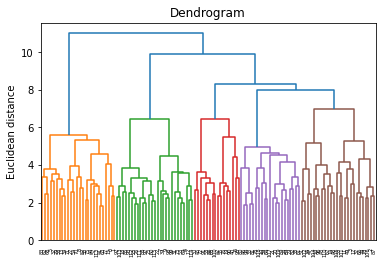

In [115]:
#agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
#labels = agg_clustering.fit_predict(cos_word_vectors)

Z = linkage(cos_word_vectors, method = "ward")
dendro = dendrogram(Z)
plt.title("Dendrogram")
plt.ylabel("Euclidean distance")
plt.show()

# 69. t-SNE Visualization

In [116]:
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(cos_word_vectors)
tsne_result.shape

/Users/camelia/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/camelia/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(116, 2)

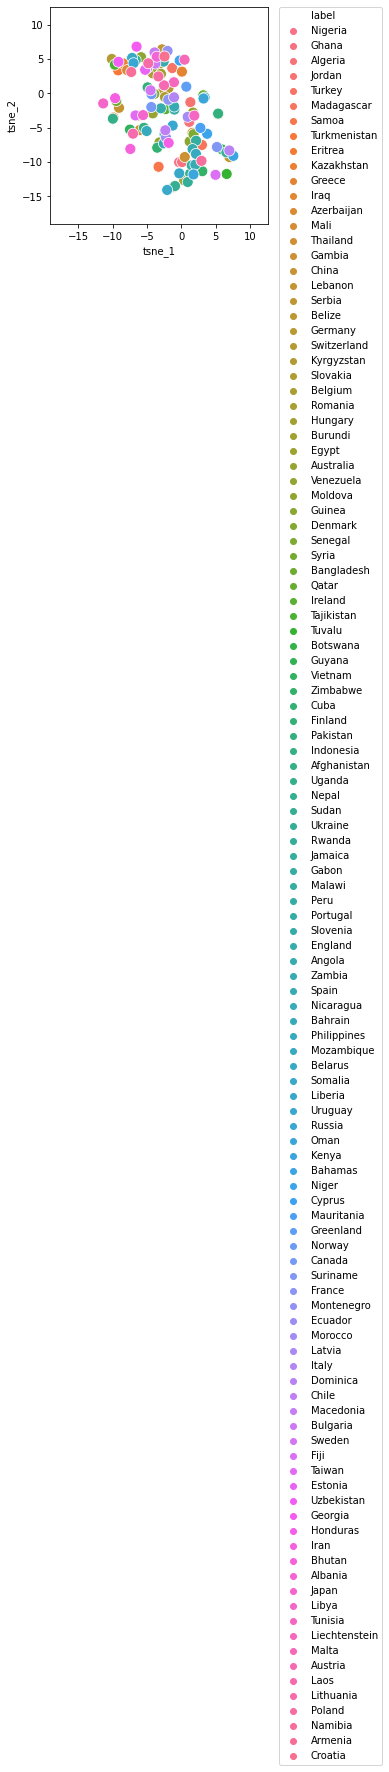

In [118]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': country_names})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)